In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statannot import add_stat_annotation
sns.set(style="ticks")
import datatable
import re
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from IPython.display import display
pd.options.display.max_columns = None
from tqdm.notebook import tqdm

In [2]:
df_master = pd.read_csv('https://api.vitaldb.net/cases')
df_master.head()

,caseid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,devices,tracks,casedur,filesize,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,opdur,anedur,los_postop,los_icu,death_inhosp,preop_htn,preop_dm,preop_arrhythmia,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_glucose,preop_alb,preop_got,preop_gpt,preop_bun,preop_cr,preop_ph,preop_hco3,preop_be,preop_pao2,preop_paco2,preop_spo2,cormack,airway,tubesize,dltubesize,lmasize,iv1,iv2,aline1,aline2,cline1,cline2,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,0,11520,-540,10860,-540,10380,-236220,627780,4,78,192,21.3,77.0,M,160.2,67.5,26.3,2.0,N,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,145,180,8,0,N,Y,N,N,Normal,14.1,189,94.0,33.2,141.0,3.1,134.0,4.3,18,16,10.0,0.82,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Left radial,N,N,N,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0
1,2,0,15720,-1020,14940,1740,14640,-221160,1506840,5,75,262,26.3,54.0,M,167.3,54.8,19.6,2.0,N,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,215,245,19,0,N,N,N,N,Normal,10.2,251,110.0,31.9,143.0,4.7,88.0,3.8,18,15,14.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,50.0,700.0,0,0,800.0,0,150,0.0,0,100,0,20,0,0,0
2,3,0,4440,-540,4260,-540,3960,-218640,40560,5,80,73,6.6,62.0,M,169.1,69.7,24.4,1.0,N,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,32,65,2,0,N,N,N,N,Normal,14.2,373,103.0,30.3,144.0,4.9,87.0,4.2,17,34,14.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,NaN,NaN,0,0,200.0,0,0,0.0,0,50,0,0,0,0,0
3,4,0,21000,-720,20280,2580,18180,-201120,576480,5,74,350,28.3,74.0,M,160.6,53.0,20.5,2.0,N,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,255,335,7,1,N,Y,N,N,Normal,14.4,275,103.0,34.5,141.0,4.2,108.0,4.1,23,18,10.0,0.96,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,NaN,NaN,NaN,Left forearm,N,Right radial,N,N,N,NaN,270.0,0,0,2700.0,0,80,0.0,100,100,0,50,0,0,0
4,5,0,21540,-960,22440,2640,21840,-67560,3734040,6,99,359,41.0,66.0,M,171.0,59.7,20.4,3.0,Y,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,295,350,45,13,N,Y,N,Left anterior fascicular block,Normal,10.1,67,73.0,36.5,146.0,4.4,126.0,2.6,765,77,50.0,4.43,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Right radial,N,Right IJV,N,2600.0,1490.0,8,8,7100.0,0,0,0.0,0,160,0,10,900,0,2100


In [3]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388 entries, 0 to 6387
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               6388 non-null   int64  
 1   casestart            6388 non-null   int64  
 2   caseend              6388 non-null   int64  
 3   anestart             6388 non-null   int64  
 4   aneend               6388 non-null   int64  
 5   opstart              6388 non-null   int64  
 6   opend                6388 non-null   int64  
 7   adm                  6388 non-null   int64  
 8   dis                  6388 non-null   int64  
 9   devices              6388 non-null   int64  
 10  tracks               6388 non-null   int64  
 11  casedur              6388 non-null   int64  
 12  filesize             6388 non-null   float64
 13  age                  6388 non-null   float64
 14  sex                  6388 non-null   object 
 15  height               6388 non-null   f

In [6]:
df_lab = pd.read_csv('https://api.vitaldb.net/labs')
df_lab.head()

,caseid,dt,name,result
0,1867,143869,Calcium,8.7
1,1867,143869,Phosphorus,3.2
2,1867,143869,BUN,10.0
3,1867,143869,Uric Acid,7.1
4,1867,143869,"Protein, total",7.3


In [59]:
df_lab['name'].value_counts()

Hct                                                      66746
Potassium                                                63366
Sodium                                                   63344
Hb                                                       50959
WBC                                                      50919
                                                         ...  
Troponin T                                                  16
(PFA100, C/EPI)                                             14
NT-proBNP (N-terminal pro B-type natriuretic peptide)       13
Free T3                                                     10
(PFA100, C/ADP)                                              4
Name: name, Length: 73, dtype: int64

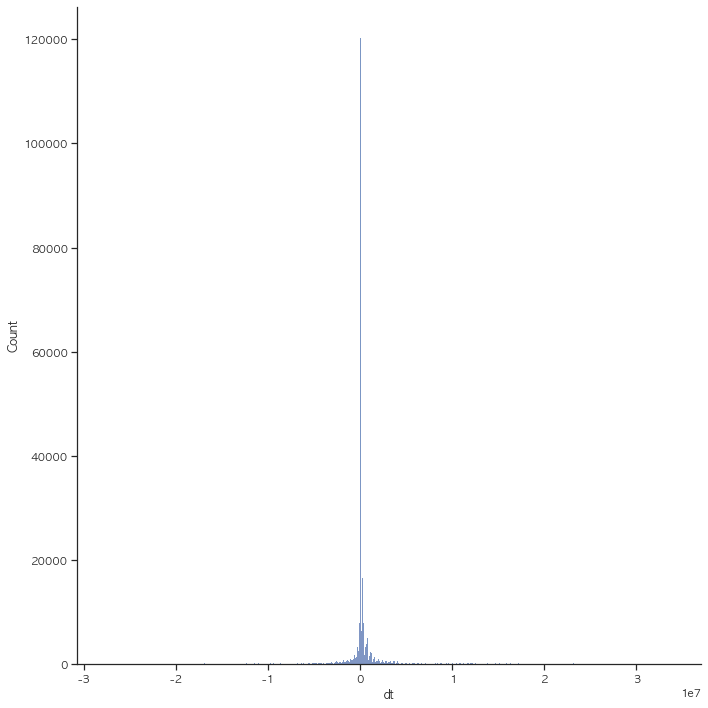

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_lab['dt'], height=10)
plt.show()

In [9]:
df_lab['dt'].describe()

count    1.276511e+06
mean     1.038184e+06
std      5.790568e+06
min     -2.767542e+07
25%     -5.365600e+04
50%      9.239700e+04
75%      7.782670e+05
max      3.395952e+07
Name: dt, dtype: float64

In [48]:
pd.pivot_table(df_lab, values=['result'], columns=['name'], index=['caseid', 'dt']).columns.droplevel(0)

Index(['(PFA100, C/ADP)', '(PFA100, C/EPI)', 'Albumin', 'Alkaline phosphatase',
       'Ammonia', 'Amylase (Body Fluid Except CSF)', 'Amylase(S)',
       'Antithrombin', 'B-type Natriuretic Peptide(BNP)', 'BE', 'BUN',
       'Bilirubin, direct', 'Bilirubin, total', 'CK (CPK)', 'CKMB', 'Calcium',
       'Calcium, ionized', 'Chloride', 'Chloride (random urine)', 'Creatinine',
       'Creatinine Clearance (24hrs urine, Ccr)', 'Cyclosporine',
       'Cyclosporine (Whole blood)', 'Cystatin C', 'Digoxin (serum level)',
       'ESR', 'FBS', 'Ferritin', 'Fibrinogen', 'Free T3', 'GGT', 'GOT (AST)',
       'GPT (ALT)', 'Glucose', 'HCO3-', 'Hb', 'Hb A1c', 'Hct', 'Iron',
       'Lactic acid', 'Magnesium', 'NGAL,quantitative test',
       'NT-proBNP (N-terminal pro B-type natriuretic peptide)', 'Osmolality',
       'Osmolality(urine)', 'O₂SAT', 'PLT', 'PT (%)', 'PT (INR)', 'PT (sec)',
       'Phosphorus', 'Potassium', 'Potassium (random urine)', 'Protein, total',
       'Sirolimus', 'Sodium', 'Sodi

In [44]:
pd.pivot_table(df_lab, values=['result'], columns=['name'], index=['caseid', 'dt']).columns.get_level_values(1)

Index(['(PFA100, C/ADP)', '(PFA100, C/EPI)', 'Albumin', 'Alkaline phosphatase',
       'Ammonia', 'Amylase (Body Fluid Except CSF)', 'Amylase(S)',
       'Antithrombin', 'B-type Natriuretic Peptide(BNP)', 'BE', 'BUN',
       'Bilirubin, direct', 'Bilirubin, total', 'CK (CPK)', 'CKMB', 'Calcium',
       'Calcium, ionized', 'Chloride', 'Chloride (random urine)', 'Creatinine',
       'Creatinine Clearance (24hrs urine, Ccr)', 'Cyclosporine',
       'Cyclosporine (Whole blood)', 'Cystatin C', 'Digoxin (serum level)',
       'ESR', 'FBS', 'Ferritin', 'Fibrinogen', 'Free T3', 'GGT', 'GOT (AST)',
       'GPT (ALT)', 'Glucose', 'HCO3-', 'Hb', 'Hb A1c', 'Hct', 'Iron',
       'Lactic acid', 'Magnesium', 'NGAL,quantitative test',
       'NT-proBNP (N-terminal pro B-type natriuretic peptide)', 'Osmolality',
       'Osmolality(urine)', 'O₂SAT', 'PLT', 'PT (%)', 'PT (INR)', 'PT (sec)',
       'Phosphorus', 'Potassium', 'Potassium (random urine)', 'Protein, total',
       'Sirolimus', 'Sodium', 'Sodi

In [57]:
df_lab_pivoted = pd.pivot_table(df_lab, values=['result'], columns=['name'], index=['caseid', 'dt'])
df_lab_pivoted.columns = df_lab_pivoted.columns.droplevel(0)
df_lab_pivoted = df_lab_pivoted.rename_axis(None, axis=1)
df_lab_pivoted = df_lab_pivoted.reset_index()

In [39]:
df_lab

,caseid,dt,"(PFA100, C/ADP)","(PFA100, C/EPI)",Albumin,Alkaline phosphatase,Ammonia,Amylase (Body Fluid Except CSF),Amylase(S),Antithrombin,B-type Natriuretic Peptide(BNP),BE,BUN,"Bilirubin, direct","Bilirubin, total",CK (CPK),CKMB,Calcium,"Calcium, ionized",Chloride,Chloride (random urine),Creatinine,"Creatinine Clearance (24hrs urine, Ccr)",Cyclosporine,Cyclosporine (Whole blood),Cystatin C,Digoxin (serum level),ESR,FBS,Ferritin,Fibrinogen,Free T3,GGT,GOT (AST),GPT (ALT),Glucose,HCO3-,Hb,Hb A1c,Hct,Iron,Lactic acid,Magnesium,"NGAL,quantitative test",NT-proBNP (N-terminal pro B-type natriuretic peptide),Osmolality,Osmolality(urine),O_AT,PLT,PT (%),PT (INR),PT (sec),Phosphorus,Potassium,Potassium (random urine),"Protein, total",Sirolimus,Sodium,Sodium (random urine),T3,T4(free),TSH,Tacrolimus (FK-506),Tacrolimus(FK-506),Triglyceride (TG),Troponin I,Troponin T,Uric Acid,WBC,aPTT,eGFR(MDRD),hs-CRP quantitation,pCO,pH,pO
0,1,-154782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-123020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,-38769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,27.0,NaN,NaN,35.0,NaN,1.2,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,7.46,433.0
4,1,4628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,27.2,NaN,NaN,39.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,7.44,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170466,6388,62645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,NaN,35.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.34,NaN,NaN,NaN,NaN,NaN,NaN
170467,6388,-249820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,NaN,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.66,NaN,NaN,NaN,NaN,NaN,NaN
170468,6388,-58730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170469,6388,-32848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,NaN,33.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [52]:
df_lab.groupby(['caseid']).apply(lambda x: (x['ESR'].notnull()).any()).value_counts()

False    5096
True      755
dtype: int64

In [55]:
df_lab.groupby(['caseid']).apply(lambda x: (x['Ammonia'].notnull()).any()).value_counts()

False    5630
True      221
dtype: int64

In [56]:
df_lab.groupby(['caseid']).apply(lambda x: (x['Sodium'].notnull()).any()).value_counts()

True     5449
False     402
dtype: int64

In [58]:
df_lab.groupby(['caseid']).apply(lambda x: (x['AST'].notnull()).any()).value_counts()

KeyError: 'AST'

In [61]:
df_lab = pd.read_csv('https://api.vitaldb.net/labs')

In [63]:
df_lab[df_lab['name'] == 'ALT']

,caseid,dt,name,result


In [67]:
df_lab['name'].value_counts().reset_index().to_excel('test.xlsx', index=False)

In [68]:
df_lab

,caseid,dt,name,result
0,1867,143869,Calcium,8.70
1,1867,143869,Phosphorus,3.20
2,1867,143869,BUN,10.00
3,1867,143869,Uric Acid,7.10
4,1867,143869,"Protein, total",7.30
...,...,...,...,...
1276506,3549,12900803,Creatinine,4.77
1276507,3549,12900803,Sodium,134.00
1276508,3549,12900803,Potassium,3.50
1276509,3549,12900803,Chloride,111.00
